In [13]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

DecisionTree with featurs [0, 1] has a scores of 0.926666666667
RandomForest with 30 estimators with featurs [0, 1] has a scores of 0.926666666667
ExtraTrees with 30 estimators with featurs [0, 1] has a scores of 0.926666666667
AdaBoost with 30 estimators with featurs [0, 1] has a scores of 0.84
DecisionTree with featurs [0, 2] has a scores of 0.993333333333
RandomForest with 30 estimators with featurs [0, 2] has a scores of 0.986666666667
ExtraTrees with 30 estimators with featurs [0, 2] has a scores of 0.993333333333
AdaBoost with 30 estimators with featurs [0, 2] has a scores of 0.993333333333
DecisionTree with featurs [2, 3] has a scores of 0.993333333333
RandomForest with 30 estimators with featurs [2, 3] has a scores of 0.986666666667
ExtraTrees with 30 estimators with featurs [2, 3] has a scores of 0.993333333333
AdaBoost with 30 estimators with featurs [2, 3] has a scores of 0.993333333333


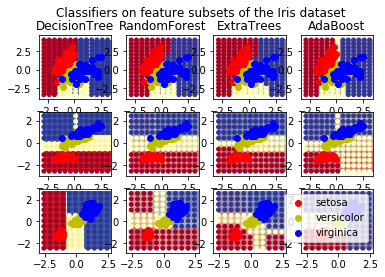

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
n_estimators = 30
random_seed = 13
cmap = plt.cm.RdYlBu
points_colors = "ryb"
estimators = [DecisionTreeClassifier(max_depth=None),
             RandomForestClassifier(n_estimators=n_estimators),
             ExtraTreesClassifier(n_estimators=n_estimators),
             AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                n_estimators=n_estimators)]
plt_idx = 1
grid_step = 0.02
coarser_grid_step = 0.5
for index in ([0,1],[0,2],[2,3]):
    X = iris_dataset.data[:,index]
    y = iris_dataset.target
    for estimator in estimators:
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        X_mean = np.mean(X,axis = 0)
        X_std = np.std(X,axis = 0)
        X = (X-X_mean)/X_std
        estimator.fit(X,y)
        scores = estimator.score(X,y)
        estimator_title = str(type(estimator)).split('.')[-1][:-2][:-len('Classifier')]
        estimator_details = estimator_title
        if hasattr(estimator,'estimators_'):
            estimator_details += ' with {} estimators'.format(len(estimator.estimators_))
        print(estimator_details+' with featurs',index,'has a scores of',scores)
        plt.subplot(3,4,plt_idx)
        if plt_idx<=len(estimators):
            plt.title(estimator_title)
        xmin,xmax = X[:,0].min()-1,X[:,0].max()+1
        ymin,ymax = X[:,1].min()-1,X[:,1].max()+1
        xx,yy = np.meshgrid(np.arange(xmin,xmax,grid_step),
                            np.arange(ymin,ymax,grid_step))
        if isinstance(estimator,DecisionTreeClassifier):
            Z = estimator.predict(np.c_[xx.ravel(),yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx,yy,Z,cmap = cmap)
        else:
            estimator_alpha = 1.0/len(estimator.estimators_)
            for base_estimator in estimator.estimators_:
                Z = base_estimator.predict(np.c_[xx.ravel(),yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx,yy,Z,cmap = cmap,alpha = estimator_alpha)
        xx_coarser,yy_coarser = np.meshgrid(np.arange(xmin,xmax,coarser_grid_step),
                                           np.arange(ymin,ymax,coarser_grid_step))
        Z_coarser = estimator.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()])
        Z_coarser = Z_coarser.reshape(xx_coarser.shape)
        plt.scatter(xx_coarser,yy_coarser,c = Z_coarser,s = 15,cmap = cmap)
        for label,color in zip(set(y),points_colors):
            idx = np.where(y==label)
            plt.scatter(X[idx,0],X[idx,1],c = color,
                        label = iris_dataset.target_names[label],cmap = cmap)
        plt_idx += 1
plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")
plt.legend()
plt.show()